# Files
## Reading Text Files
A text file contains data consisting of a sequence of characters, with each line terminated by a newline character. Many common files are text files, such as `.txt` files created with a text editor, Python code files, and `.fasta` files which contain DNA sequences.

The file `simple_gene.fasta` is a text file containing the following data:
```
>AB000263 |acc=AB000263|descr=Homo sapiens mRNA for prepro cortistatin like peptide, complete cds.|len=368
TCAATAGTCAGCTGCACTCGAGCGACTCTGAAGGACCTGCCCCCTGTCCGACACCCCAAA
GAGTCTATTGACCCGGGGACGCGAGTCCTCCGGAAGTGGGAGACGAGACCCATTTCAAGT
AACCTTGTCTTTCTTTACCTAAATAGACGAGAAGCGCAACTTCTTCATGTTTTACAGTAA
TTACGATACGTCTTTTAGAATCTCACAGGGTAGACAGACCTCAACTAGTTCCTTGGACAG
AGGTGTTTCACACTGGTGTATAAAACGTTTAAAACGTACGACTT
```
The idiomatic (and most common) way to read a text file in Python is as follows, which allows us to read the text file one line at a time. The following program opens the file `simple_gene.fasta` and then iterates over each line of text, sequentially reading each line of text into the `line` string variable.

In [1]:
with open("simple_gene.fasta") as f: # Open the file and store it in file object f
    for line in f: # Iterate over each line of text in the file
        print(line) # line is a string variable containing one line of text

>AB000263 |acc=AB000263|descr=Homo sapiens mRNA for prepro cortistatin like peptide, complete cds.|len=368

TCAATAGTCAGCTGCACTCGAGCGACTCTGAAGGACCTGCCCCCTGTCCGACACCCCAAA

GAGTCTATTGACCCGGGGACGCGAGTCCTCCGGAAGTGGGAGACGAGACCCATTTCAAGT

AACCTTGTCTTTCTTTACCTAAATAGACGAGAAGCGCAACTTCTTCATGTTTTACAGTAA

TTACGATACGTCTTTTAGAATCTCACAGGGTAGACAGACCTCAACTAGTTCCTTGGACAG

AGGTGTTTCACACTGGTGTATAAAACGTTTAAAACGTACGACTT


:::{note} 
- Python will look for the file in the **same** folder as the `ipynb` file.
- The file object `f` is available within the indented `with` block
- There are **two** levels of indentation - one for the `with` statement, and one for the `for` loop.
- The `with` statement ensures that the file is properly closed once the statements within its block are executed.
:::

## Opening Files

The `open` function takes two parameters, `filename` and `mode`.

```
with open(filename, mode) as f:
...
```

There are four different modes for opening a file: 

`r` - Read - Default value. Opens a file for reading, raising an error if the file does not exist.  
`a` - Append - Opens a file for appending, creating the file if it does not exist.  
`w` - Write - Opens a file for writing (replacing existing file contents), or creating the file if it does not exist.  
`x` - Create - Creates the specified file, raising an error if the file exists.  

Additionally, we can choose to open the file as binary or text:

`t` - Text - Default value.  
`b` - Binary - Binary mode (e.g. images, raw data)

For example, to open a file for appending binary data:

```
open(filename, "ab")
```

In this course we will mainly be using files in text mode, which is most common in practice.

## Reading Files

To open a file for reading, you can just use `open(filename)` without a `mode` argument, since read mode is the default.

To read a the entire contents of a file in to string variable, use `file.read()`:

In [0]:
with open("simple_gene.fasta") as f:
    whole_file = f.read()

To read a single line, use `file.readline()`:

In [0]:
with open("simple_gene.fasta") as f:
    first_line = f.readline()
    second_line = f.readline()

To read one line at a time, use a loop:

In [2]:
lines = []
with open("simple_gene.fasta") as f:
    for line in f:
        lines.append(f)

Or specify the number of characters to read as an argument `file.read(n)`:

In [3]:
with open("simple_gene.fasta") as f:
    first_6_chars = f.read(6)

## Example: Reading a fasta file

A `fasta` file is a popular text-based format for storing DNA sequence data. A sequence in `fasta` format begins with a single-line description, followed by lines of sequence data. The description line is distinguished from the sequence data by a greater-than (">") symbol in the first position. Typically all lines of text are shorter than 80 characters in length.  

The following code opens the fasta file and reads its contents into a string variable `sequence`. The line beginning with `>` is discarded, and newline characters are removed using `string.strip()`

In [4]:
# Open the fasta file containing the DNA sequence

file_name = "simple_gene.fasta"
with open(file_name) as f:
    sequence = ""
    for line in f:
        if line[0] != ">":
            sequence = sequence + line.strip()

print(sequence)

TCAATAGTCAGCTGCACTCGAGCGACTCTGAAGGACCTGCCCCCTGTCCGACACCCCAAAGAGTCTATTGACCCGGGGACGCGAGTCCTCCGGAAGTGGGAGACGAGACCCATTTCAAGTAACCTTGTCTTTCTTTACCTAAATAGACGAGAAGCGCAACTTCTTCATGTTTTACAGTAATTACGATACGTCTTTTAGAATCTCACAGGGTAGACAGACCTCAACTAGTTCCTTGGACAGAGGTGTTTCACACTGGTGTATAAAACGTTTAAAACGTACGACTT


## Writing Files

To write to a file, first open the file using one of the three write modes 'append', 'write' and 'create'. Then, use `file.write(text)` to write to the file.

In [5]:
# open a file for writing, overwriting if it already exists.
with open("numbers.txt", "w") as f:
    f.write("one\n")
    f.write("two\n")

:::{note}
There is no equivalent to `file.readline()` for writing. Instead, use `file.write(text + "\n")` to append a newline character.
:::


## Example: Editing a File

For historical and performance reasons, we do not typically edit files directly. Instead, we combine read and write operations to convert an input file into an output file. For example, suppose we would like to add line numbers to a text file `coleridge.txt`.

Input:
```
In Xanadu did Kubla Khan
A stately pleasure-dome decree:
Where Alph, the sacred river, ran
...
```

Output:
```
Line 1: In Xanadu did Kubla Khan
Line 2: A stately pleasure-dome decree:
Line 3: Where Alph, the sacred river, ran
...
```

We open two files, one for reading and another for writing. We then loop over the rows of the input file, simultaneously writing lines to the output file.

In [6]:
with open('coleridge.txt') as f_in: # open file for reading
    with open('coleridge_new.txt', "w") as f_out: # open file for writing
        i = 1
        for line in f_in:
            f_out.write("Line " + str(i) + ": " + line)
            i += 1

## CSV Files
A CSV file (Comma Separated Values file) is a plain text file which contains tabular data. Typically a CSV file uses commas to separate columns and new lines to separate rows. The file `periodic_table.csv` (in the same folder as this `ipynb` file) contains tabular data related to the chemical elements:

```
number,name,symbol,appearance,atomic_number,boiling_point
1,Hydrogen,H,colorless gas,1,20.271
2,Helium,He,"colorless gas, exhibiting a red-orange glow when placed in a high-voltage electric field",2,4.222
3,Lithium,Li,silvery-white,3,1603
...
```

CSV files are very commonly used to store scientific data and are very useful for transferring data between different systems. It is possible to read the file using standard Python file and string processing instructions, for example using `string.split` to extract data columns. However, because CSV files are so common, Python includes a special module `csv` which includes functions to automate much of this work.

:::{note}
If you open a `.csv` file on your computer, it might automatically open in MS Excel or other spreadsheet program. However, in fact it is not a spreadsheet file. To see the file in plain text form, open it in a text editor such as notepad (Windows) or TextEdit (Mac). If you are doing a lot of work with text files, it is recommended that you install a dedicated text processing program such as Notepad++ (Windows) or Atom (multiple platforms).
:::

The following code reads the first, second and sixth columns into four lists:

In [3]:
import csv # import the csv module

numbers = []
names = []
melting_points = []
boiling_points = []

with open("periodic_table.csv") as f:
    reader = csv.reader(f) # create a reader object from the file
    next(reader) # ignore the header row of the CSV file
    for row in reader: # iterate over the rows, reading each into a list of strings called row
        num = int(row[0]) # convert from string to int
        name = row[1]
        # Check if the 5th and 6th columns contain numeric data
        if row[5].isnumeric() and row[6].isnumeric():
            mp = float(row[5])
            bp = float(row[6])
            # Append the values to the lists
            numbers.append(num)
            names.append(name)
            melting_points.append(float(mp))
            boiling_points.append(float(bp))

Now we have four lists containing four columns from the CSV file. Let's make a scatter plot showing boiling point against melting point:

Text(0.5, 1.0, 'Melting and Boiling Points of Chemical Elements')

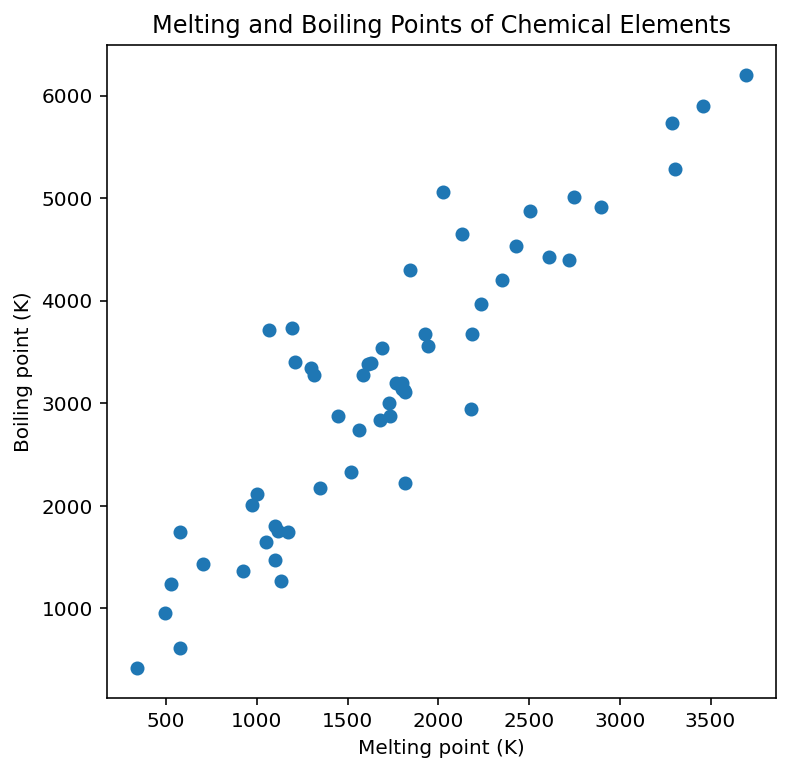

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(melting_points, boiling_points) # Plot a scatter plot
plt.xlabel("Melting point (K)")
plt.ylabel("Boiling point (K)")
plt.title("Melting and Boiling Points of Chemical Elements")